In [1]:
import pandas as pd
import numpy as np

ВВП США

In [2]:
us_gdp = pd.read_csv('data/us_gdp_total.csv', index_col=1, header=[0], parse_dates=True)
# eu28_gdp.iloc[20:,]
us_gdp = us_gdp[['value']]
us_gdp = us_gdp.iloc[-55:,:]

ВВП для каждой из 50 штатов:

In [3]:
us_gdp_geo = pd.read_csv('data/us_total_ind.csv', index_col=0, header=[0], parse_dates=True)

ВВП для каждого штата для каждой из отраслей

In [4]:
us_ind = pd.read_csv('data/us_gdp_us_state_ind.csv', index_col=0, header=[0], parse_dates=True)

In [5]:
us_ind.shape

(54, 1200)

In [6]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
len(states)

50

In [7]:
ind = ['INF', 'AGR', 'RET', 'TRA', 'NDU', 'HLT',
       'DUR', 'ACC', 'UTI', 'MAN', 'MNG', 'ADM', 'MIN', 'RER',
       'EDC', 'ART', 'OTH', 'FIN', 'WHO', 'PRO', 'CON'] # , 'GOV'   ,
len(ind)

21

In [8]:
ind_codes = []
for i in list(states):
    for j in list(ind):
        ind_codes.append(i+j)

In [9]:
us_ind = us_ind[ind_codes]

In [10]:
us_ind.shape

(54, 1050)

Разница между ВВП США и суммой ВДС для каждого штата (не больше 2% ).

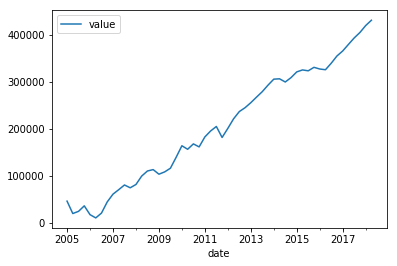

In [22]:
us_gdp.iloc[:-1,].mul(1000).sub(us_gdp_geo.sum(axis=1), axis=0).plot();

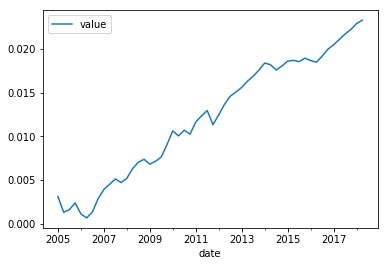

In [12]:
us_gdp.iloc[:-1,].mul(1000).sub(us_gdp_geo.sum(axis=1), axis=0).div(us_gdp.iloc[:-1,].mul(1000)).plot();

Разница между ВВП США и суммой ВВП для каждого из 50 штатов стран по каждой из отраслей

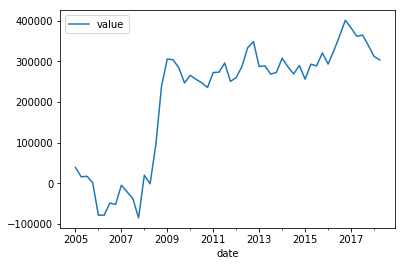

In [26]:
us_gdp.iloc[:-1,].mul(1000).sub(us_ind.sum(axis=1), axis=0).plot();

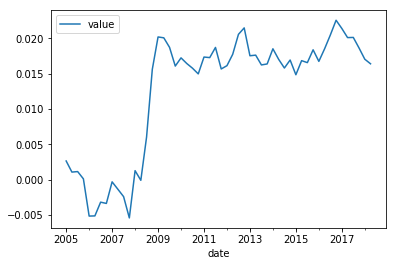

In [19]:
us_gdp.iloc[:-1,].mul(1000).sub(us_ind.sum(axis=1), axis=0).div(us_gdp.iloc[:-1,].mul(1000)).plot();

Запишем файлы для `hts`, дающие в сумме `us_gdp`

1. по штатам - добавим столбик с налогами

In [31]:
us_gdp_geo['ZZ'] = us_gdp.iloc[:-1,].mul(1000).sub(us_gdp_geo.sum(axis=1), axis=0)

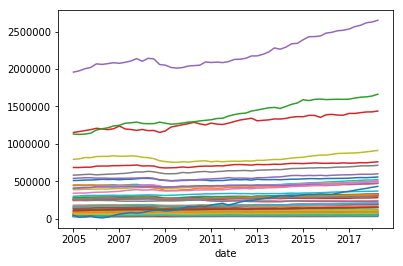

In [39]:
us_gdp_geo.plot(legend=False);

In [34]:
us_gdp_geo.to_csv('hts_us_geo.csv')

Все очень плохо

In [35]:
us_ind['ZZTAX'] = us_gdp.iloc[:-1,].mul(1000).sub(us_ind.sum(axis=1), axis=0)

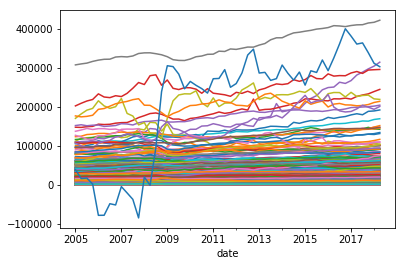

In [40]:
us_ind.plot(legend=False);